# Transformação Linear Definida por Partes e Fatiamento de Níveis de Intensidade

***Objetivo***: Compreender e aplicar técnicas de transformação linear por partes e fatiamento de níveis de intensidade em imagens, explorando a capacidade de manipular faixas específicas de intensidade para destacar ou suprimir detalhes em imagens médicas.

# Metodologia e Implementação

## Configurações do Projeto

Nesta seção, instalamos as bibliotecas necessárias para o projeto, incluindo `pandas`, `matplotlib`, `opencv-python` e `numpy`. Estas bibliotecas são fundamentais para manipulação de imagens, visualização de dados e cálculos numéricos.


In [ ]:
!pip install pandas matplotlib opencv-python numpy

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def calcular_histograma(imagem):    
    histograma = np.zeros(256, dtype=int)
        
    for valor in imagem.flatten():  
        histograma[valor] += 1  
    
    return histograma

## Carregar e Exibir a Imagem Original

Aqui, carregamos uma imagem em tons de cinza usando a função cv2.imread() do OpenCV. Em seguida, a imagem é exibida utilizando a biblioteca matplotlib, permitindo visualizar o conteúdo da imagem original.


(np.float64(-0.5), np.float64(888.5), np.float64(888.5), np.float64(-0.5))

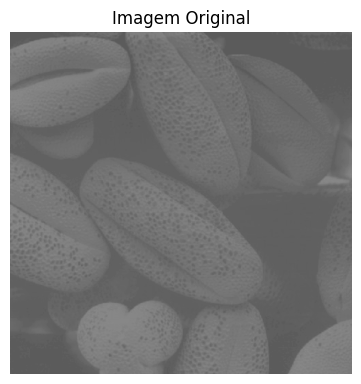

In [30]:
image = cv2.imread('images/graos_polen.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)  
plt.title('Imagem Original')
plt.axis('off')


## Equalização de Histograma Manual

A equalização de histograma é um método utilizado para melhorar o contraste de uma imagem. Nesta parte do código, comparamos a implementação da equalização de histograma manual com a função equalizeHist() do OpenCV. O objetivo é mostrar como diferentes abordagens podem resultar em imagens com melhor contraste, permitindo ao usuário observar a eficácia da técnica.

***manual_histograma_equalizacao***: A função realiza a equalização de histograma de forma manual. Primeiro, o histograma da imagem é calculado e normalizado para obter a distribuição de probabilidade de intensidade. Em seguida, a função calcula a função de distribuição acumulada (CDF), que é usada para redistribuir os níveis de intensidade da imagem, expandindo o contraste da imagem original. O resultado é uma imagem com maior contraste, onde as intensidades são redistribuídas para ocupar a faixa completa de 0 a 255, melhorando a visibilidade dos detalhes.


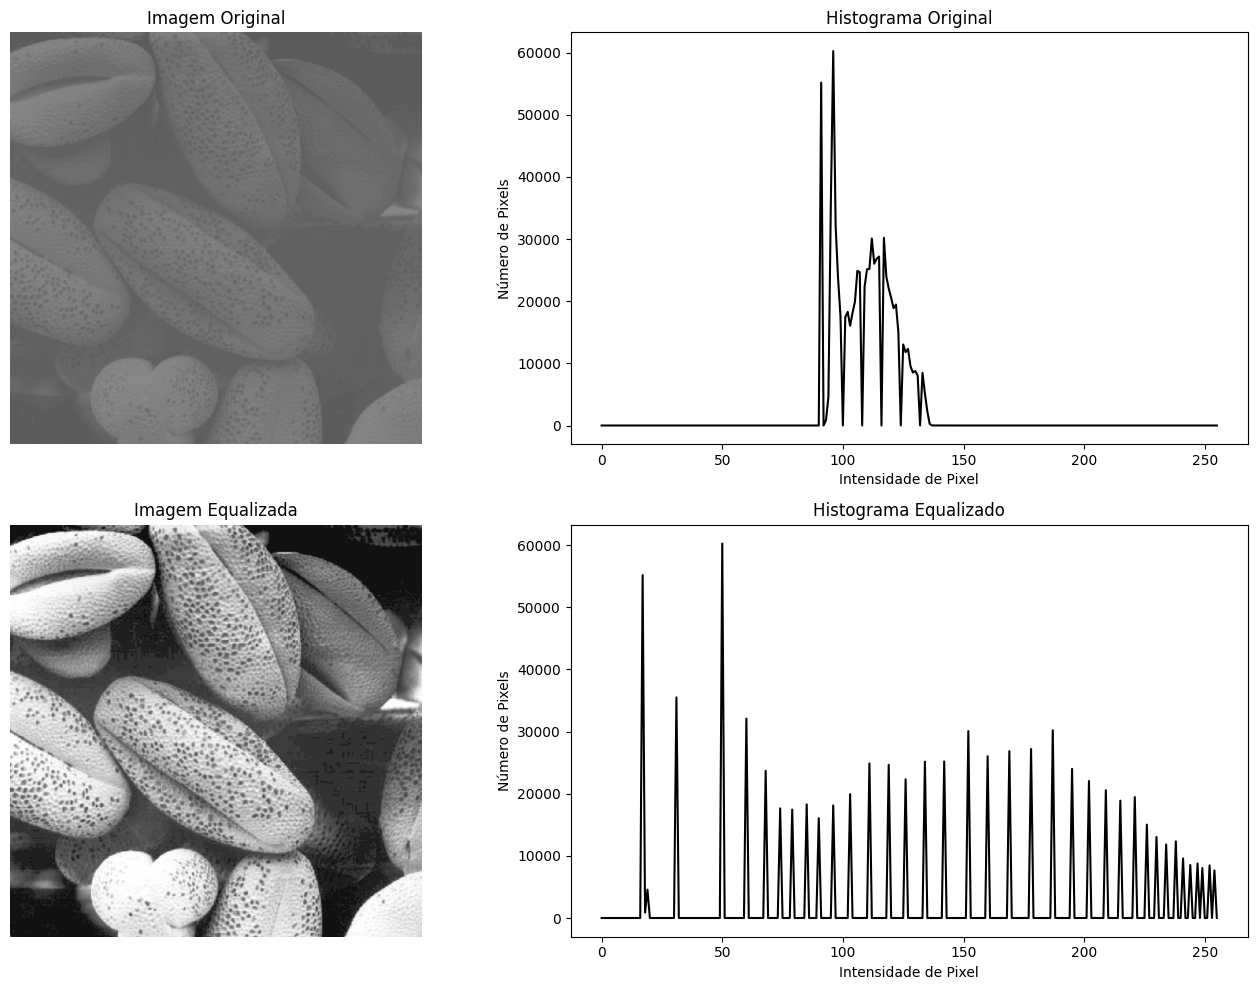

In [36]:
def manual_histograma_equalizacao(image):
    
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    hist_normalized = hist / hist.sum()

    cdf = hist_normalized.cumsum()  
    cdf_normalized = (255 * cdf).astype(np.uint8)  
    image_equalized = cdf_normalized[image]

    return image_equalized


image = cv2.imread('images/graos_polen.tif', cv2.IMREAD_GRAYSCALE)
imagem_equalizada_manual = manual_histograma_equalizacao(image)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(image), color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.subplot(2, 2, 3)
plt.imshow(imagem_equalizada_manual, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(imagem_equalizada_manual), color='black')
plt.title('Histograma Equalizado')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.tight_layout()
plt.show()


## Limiarização Manual de Imagem

Nesta seção, implementamos uma função para realizar a limiarização manual de uma imagem. A limiarização é um método simples de segmentação que transforma uma imagem em preto e branco com base em um valor de limiar definido. Também comparamos a nossa implementação com a função de limiarização do OpenCV.

***manual_threshold***: Essa função implementa a técnica de limiarização manual em uma imagem. Para cada pixel da imagem, a função compara sua intensidade com um valor de limiar (threshold_value). Se a intensidade do pixel for maior que o limiar, o pixel é definido como branco (valor 255); caso contrário, é definido como preto (valor 0). O resultado é uma imagem binária, onde os objetos ou áreas de interesse são destacados com base no valor de limiar definido.

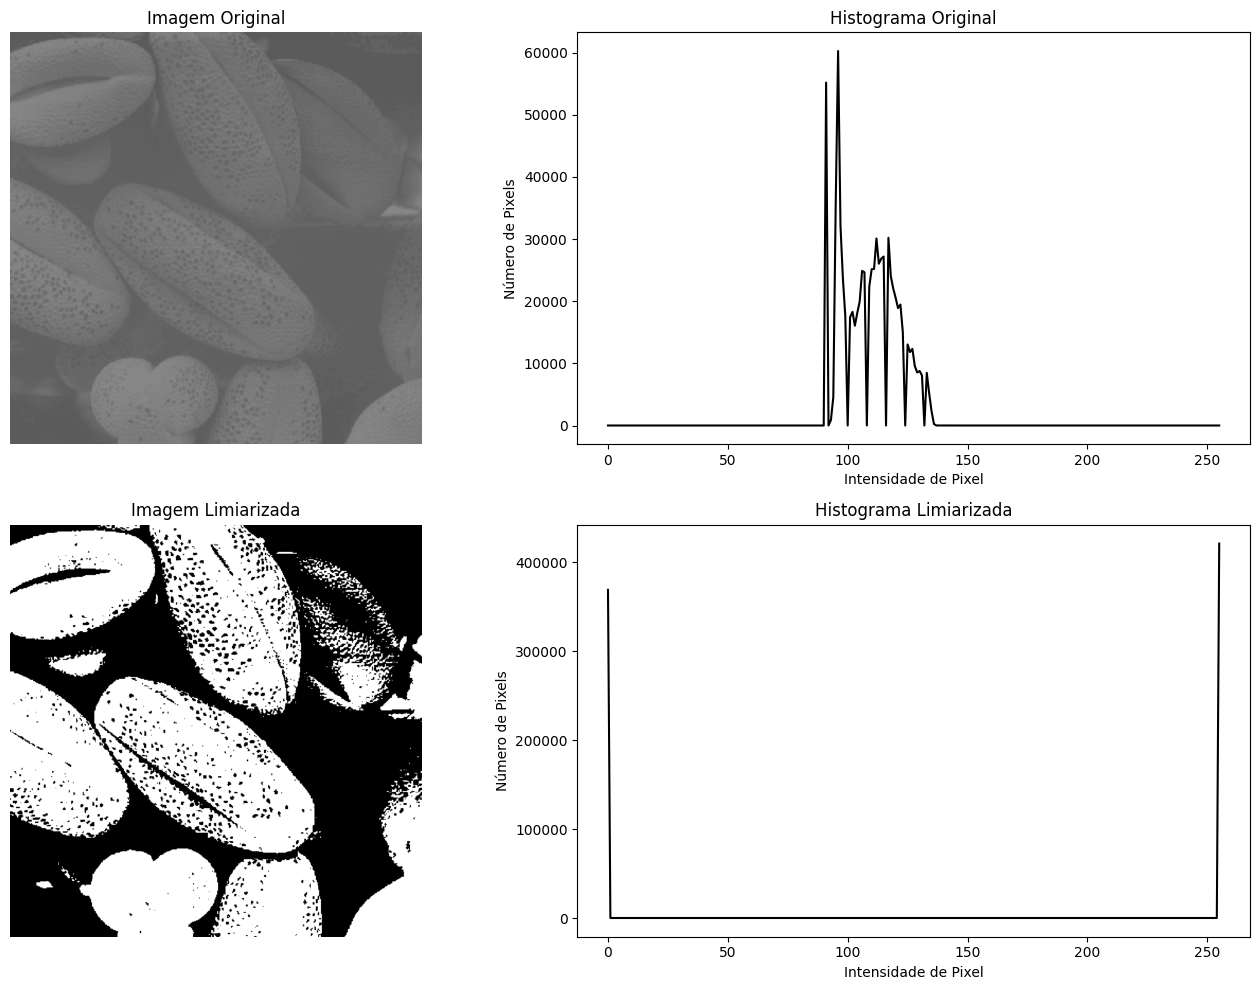

In [37]:
def manual_threshold(image, threshold_value):
    
    limiarizada = np.zeros_like(image)
    
    for i in range(image.shape[0]):  
        for j in range(image.shape[1]):  
            
            if image[i, j] > threshold_value:
                limiarizada[i, j] = 255  
            else:
                limiarizada[i, j] = 0  
    
    return limiarizada

image = cv2.imread('images/graos_polen.tif', cv2.IMREAD_GRAYSCALE)

threshold_value = 107  
limiarizada_manual = manual_threshold(image, threshold_value)


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.plot(calcular_histograma(image), color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')


plt.subplot(2, 2, 3)
plt.imshow(limiarizada_manual, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Limiarizada')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.plot(calcular_histograma(limiarizada_manual), color='black')
plt.title('Histograma Limiarizada')
plt.xlabel('Intensidade de Pixel')
plt.ylabel('Número de Pixels')

plt.tight_layout()
plt.show()

## Fatiamento de Imagem

Nesta seção, implementamos funções para realizar o fatiamento de imagens. O fatiamento é uma técnica que permite realçar ou isolar partes específicas de uma imagem com base em valores de intensidade. Apresentamos duas abordagens: o fatiamento binário e o fatiamento preservando intensidades.


In [38]:
imagem = cv2.imread('images/angiograma_aorta.tif', cv2.IMREAD_GRAYSCALE)

def fatiamento_binario(imagem, A, B):    
    mascara = (imagem >= A) & (imagem <= B)  
    imagem_fatiada = np.zeros_like(imagem)       
    imagem_fatiada[mascara] = 255
    
    return imagem_fatiada

def fatiamento_preservando_intensidade(imagem, A, B):
    imagem_ajustada = np.copy(imagem)
    imagem_ajustada[(imagem < A) | (imagem > B)] = (imagem_ajustada[(imagem < A) | (imagem > B)] * 0.2).astype(np.uint8)
        
    return imagem_ajustada



- ***fatiamento_binario***: Essa função realiza um fatiamento binário da imagem. Ela identifica os pixels cuja intensidade está entre os limites A e B e cria uma máscara para selecionar esses pixels. A função gera uma nova imagem onde os pixels dentro desse intervalo são transformados em branco (valor 255), enquanto todos os outros pixels fora desse intervalo são convertidos para preto (valor 0). O resultado é uma imagem binária destacando claramente os níveis de intensidade entre A e B.

- ***fatiamento_preservando_intensidade***: A função de fatiamento preservando intensidade modifica os pixels da imagem com base em um intervalo de intensidades definido pelos valores A e B. Nesse processo, os pixels dentro desse intervalo permanecem inalterados, preservando suas intensidades originais. No entanto, os pixels fora do intervalo são reduzidos para 20% de sua intensidade original, o que diminui o impacto visual desses pixels, destacando apenas a faixa de intensidades desejada sem removê-los completamente.

## Aplicar Fatiamento na Imagem do Angiograma

Por fim, aplicamos as técnicas de fatiamento na imagem do angiograma e exibimos as imagens resultantes, juntamente com os histogramas correspondentes. Essa análise ajuda a visualizar como o fatiamento afeta as intensidades de pixel na imagem.


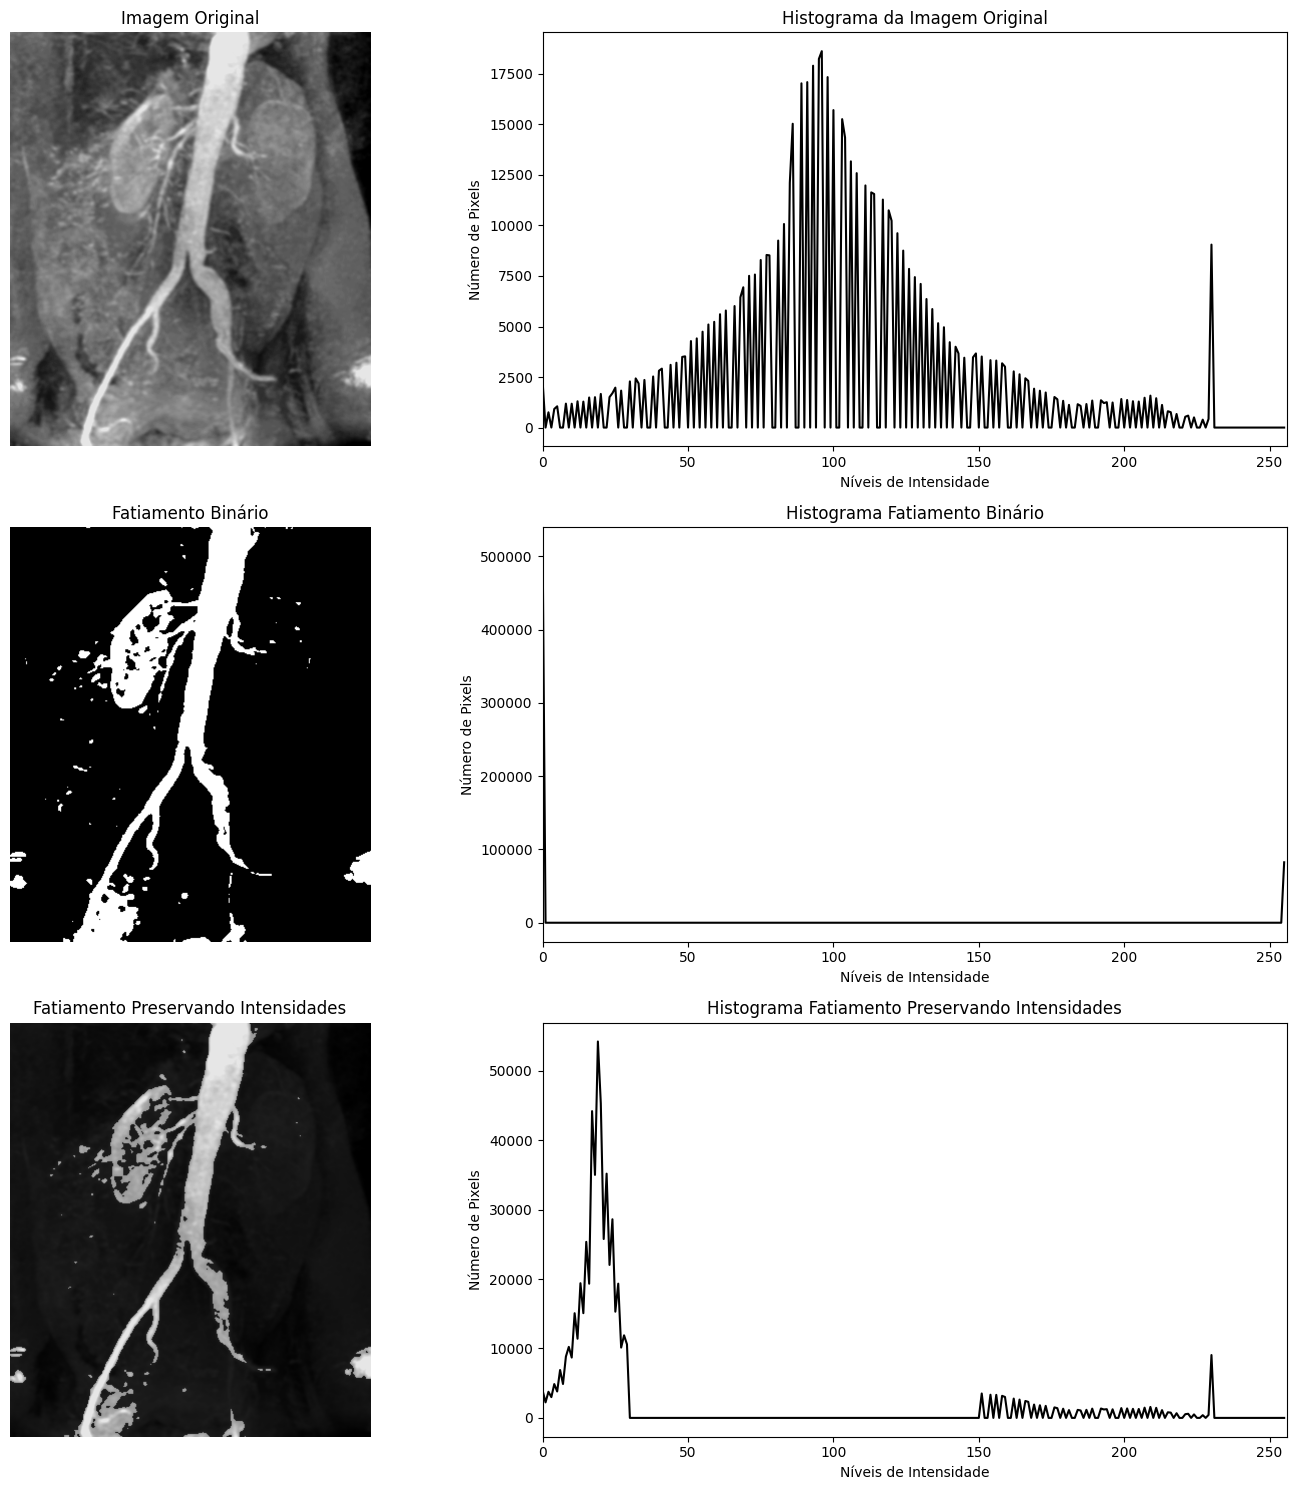

In [34]:
imagem_fatiada_binaria = fatiamento_binario(imagem, 145, 250)
imagem_fatiada_preservada = fatiamento_preservando_intensidade(imagem, 150, 255)

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].imshow(imagem, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

hist_original = calcular_histograma(imagem)
axs[0, 1].plot(hist_original, color='black')
axs[0, 1].set_title('Histograma da Imagem Original')
axs[0, 1].set_xlim([0, 256])
axs[0, 1].set_xlabel('Níveis de Intensidade')
axs[0, 1].set_ylabel('Número de Pixels')

axs[1, 0].imshow(imagem_fatiada_binaria, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title('Fatiamento Binário')
axs[1, 0].axis('off')

hist_binario = calcular_histograma(imagem_fatiada_binaria)
axs[1, 1].plot(hist_binario, color='black')
axs[1, 1].set_title('Histograma Fatiamento Binário')
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_xlabel('Níveis de Intensidade')
axs[1, 1].set_ylabel('Número de Pixels')

axs[2, 0].imshow(imagem_fatiada_preservada, cmap='gray', vmin=0, vmax=255)
axs[2, 0].set_title('Fatiamento Preservando Intensidades')
axs[2, 0].axis('off')

hist_preservada = calcular_histograma(imagem_fatiada_preservada)
axs[2, 1].plot(hist_preservada, color='black')
axs[2, 1].set_title('Histograma Fatiamento Preservando Intensidades')
axs[2, 1].set_xlim([0, 256])
axs[2, 1].set_xlabel('Níveis de Intensidade')
axs[2, 1].set_ylabel('Número de Pixels')

plt.tight_layout()
plt.show()


# Discussão sobre os resultados

**Transformação Linear Definida por Partes:** Mostra-se eficaz para destacar determinadas faixas de intensidade, útil em cenários como realce de objetos de interesse em imagens médicas. No entanto, o controle manual de faixas pode resultar em perda de detalhes em outras regiões.

**Fatiamento de Níveis de Intensidade:** Demonstrou ser uma técnica poderosa para isolar estruturas de interesse, como visto no angiograma. Ao suprimir certas faixas de intensidade, informações irrelevantes foram removidas, realçando apenas a área de interesse.

Concluindo, ambas as técnicas são eficazes, mas devem ser usadas com cautela, conforme o objetivo específico, já que podem ocultar detalhes importantes ao modificar intensidades fora da faixa de interesse.
